## Setup

In [ ]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## Prepare the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
num_classes = 62
input_shape = (41, 41, 1)

data = pd.read_csv('/content/drive/MyDrive/LAU/Fall-2022/IEA/Projects/Project 1/csv3/ann3.csv')
train_data, test_data = train_test_split(data, test_size=0.25, random_state=1, shuffle=True)

# Split datasets into features and labels
x_train = train_data.drop('0', axis=1).to_numpy()
x_test = test_data.drop('0', axis=1).to_numpy()
y_train = train_data['0'].to_numpy()
y_test = test_data['0'].to_numpy()

print("Before Slicing")
print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")

# Select 625 columns of every row to have input shape (25,25,1)
x_train = x_train[:,:1681]
x_test = x_test[:,:1681]

print(f"After Slicing")
print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")


#Feature Scaling
scaler = MinMaxScaler()
x_train =scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

Before Slicing
x_train shape: (2388, 1690) - y_train shape: (2388,)
x_test shape: (796, 1690) - y_test shape: (796,)
After Slicing
x_train shape: (2388, 1681) - y_train shape: (2388,)
x_test shape: (796, 1681) - y_test shape: (796,)


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [ ]:
len(np.unique(y_train))

62

In [ ]:
x_train = x_train.reshape([x_train.shape[0],41,41,1]).astype(float)
x_test = x_test.reshape([x_test.shape[0],41,41,1]).astype(float)

## Build the model

In [ ]:
# Architecture 1: 

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 39, 39, 32)        320       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 19, 19, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 17, 17, 64)        18496     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 4096)              0         
                                                                 
 dropout_11 (Dropout)        (None, 4096)            

In [ ]:
# Architecture 2: 


model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Dense(128,activation="relu"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 41, 41, 128)       256       
                                                                 
 conv2d_24 (Conv2D)          (None, 39, 39, 32)        36896     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 19, 19, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 17, 17, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 4096)            

In [ ]:
# Architecture 3: 

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Dense(128,activation="relu"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dense(128,activation="relu"),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 41, 41, 128)       256       
                                                                 
 conv2d_26 (Conv2D)          (None, 39, 39, 32)        36896     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 19, 19, 32)       0         
 g2D)                                                            
                                                                 
 dense_29 (Dense)            (None, 19, 19, 128)       4224      
                                                                 
 conv2d_27 (Conv2D)          (None, 17, 17, 64)        73792     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                

In [ ]:
# Architecture 4: 


model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Dense(128,activation="relu"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dense(64,activation="relu"),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 41, 41, 128)       256       
                                                                 
 conv2d_28 (Conv2D)          (None, 39, 39, 32)        36896     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 19, 19, 32)       0         
 g2D)                                                            
                                                                 
 dense_32 (Dense)            (None, 19, 19, 64)        2112      
                                                                 
 conv2d_29 (Conv2D)          (None, 17, 17, 64)        36928     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                

In [ ]:
from keras.layers import BatchNormalization
# Architecture 5: 
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Dense(128,activation="relu"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dense(64,activation="relu"),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 41, 41, 128)       256       
                                                                 
 conv2d_32 (Conv2D)          (None, 39, 39, 32)        36896     
                                                                 
 batch_normalization_1 (Batc  (None, 39, 39, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 19, 19, 32)       0         
 g2D)                                                            
                                                                 
 dense_38 (Dense)            (None, 19, 19, 64)        2112      
                                                                 
 conv2d_33 (Conv2D)          (None, 17, 17, 64)      

## Train the model

In [ ]:
batch_size = 128
epochs = 20

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/20
17/17 [==============================] - 34s 2s/step - loss: 4.1036 - accuracy: 0.0535 - val_loss: 4.1058 - val_accuracy: 0.0711
Epoch 2/20
17/17 [==============================] - 33s 2s/step - loss: 2.8859 - accuracy: 0.3262 - val_loss: 3.7780 - val_accuracy: 0.1925
Epoch 3/20
17/17 [==============================] - 31s 2s/step - loss: 1.3447 - accuracy: 0.6203 - val_loss: 3.4022 - val_accuracy: 0.4561
Epoch 4/20
17/17 [==============================] - 33s 2s/step - loss: 0.8512 - accuracy: 0.7459 - val_loss: 3.2043 - val_accuracy: 0.6402
Epoch 5/20
17/17 [==============================] - 31s 2s/step - loss: 0.5753 - accuracy: 0.8208 - val_loss: 2.9732 - val_accuracy: 0.6695
Epoch 6/20
17/17 [==============================] - 31s 2s/step - loss: 0.3611 - accuracy: 0.8893 - val_loss: 2.6569 - val_accuracy: 0.7113
Epoch 7/20
17/17 [==============================] - 30s 2s/step - loss: 0.2879 - accuracy: 0.9027 - val_loss: 2.5200 - val_accuracy: 0.7197
Epoch 8/20
17/17 [==

In [ ]:
print(history.history)

{'loss': [0.6426151394844055, 0.5941739678382874, 0.5560482740402222, 0.5288087129592896, 0.5218830108642578, 0.4895041584968567, 0.48543909192085266, 0.473481684923172, 0.4206656515598297, 0.4203503131866455, 0.4180273115634918, 0.37133198976516724, 0.3847322463989258, 0.36243200302124023, 0.3604641556739807, 0.3342055082321167, 0.32013630867004395, 0.33738812804222107, 0.31089523434638977, 0.2950204610824585], 'accuracy': [0.8008375763893127, 0.8208469152450562, 0.8143322467803955, 0.8282922506332397, 0.8315495848655701, 0.8380641937255859, 0.8408561944961548, 0.8441135287284851, 0.854816198348999, 0.8631922006607056, 0.8622615337371826, 0.8822708129882812, 0.8580735325813293, 0.8734294772148132, 0.8738948106765747, 0.887854814529419, 0.8897161483764648, 0.8818054795265198, 0.8939041495323181, 0.8962308168411255], 'val_loss': [0.8313879370689392, 0.812649667263031, 0.7823144793510437, 0.805674135684967, 0.8118503093719482, 0.7841907739639282, 0.8051038384437561, 0.7968765497207642, 0

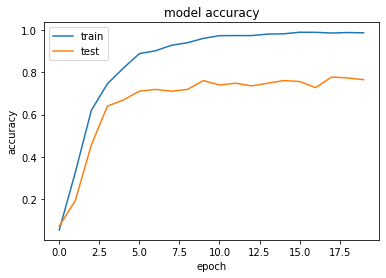

In [ ]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

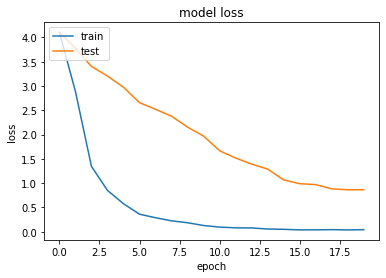

In [ ]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Evaluate the trained model

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.9167185425758362
Test accuracy: 0.7374371886253357
